In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')

In [3]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [4]:
df.shape

(1304, 2)

In [5]:
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

#### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

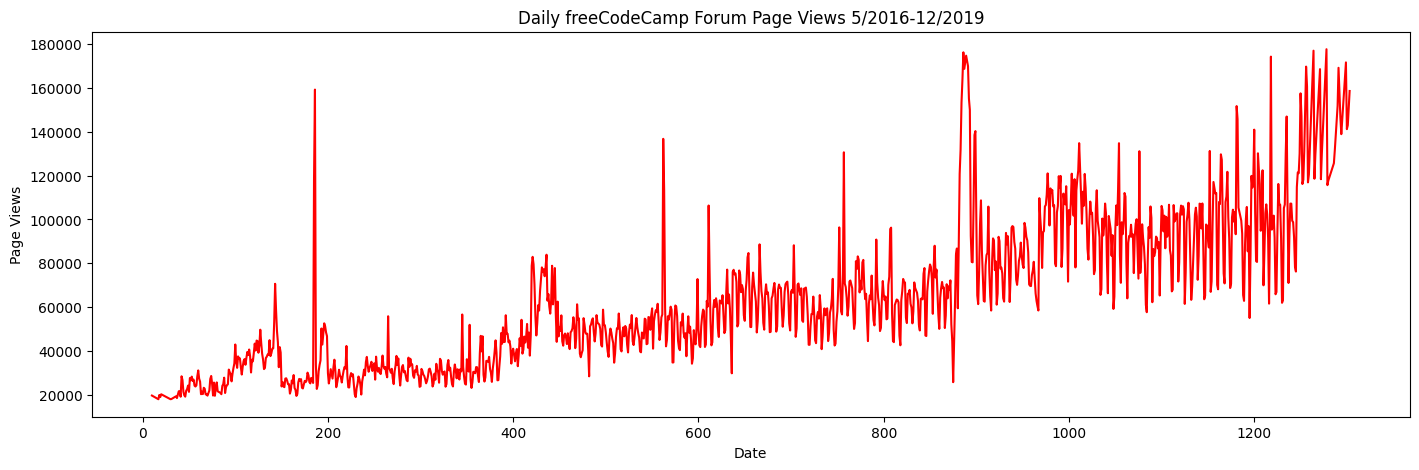

In [6]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(17, 5))
    ax.plot(df.index, df['value'], color='red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

draw_line_plot()

#### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

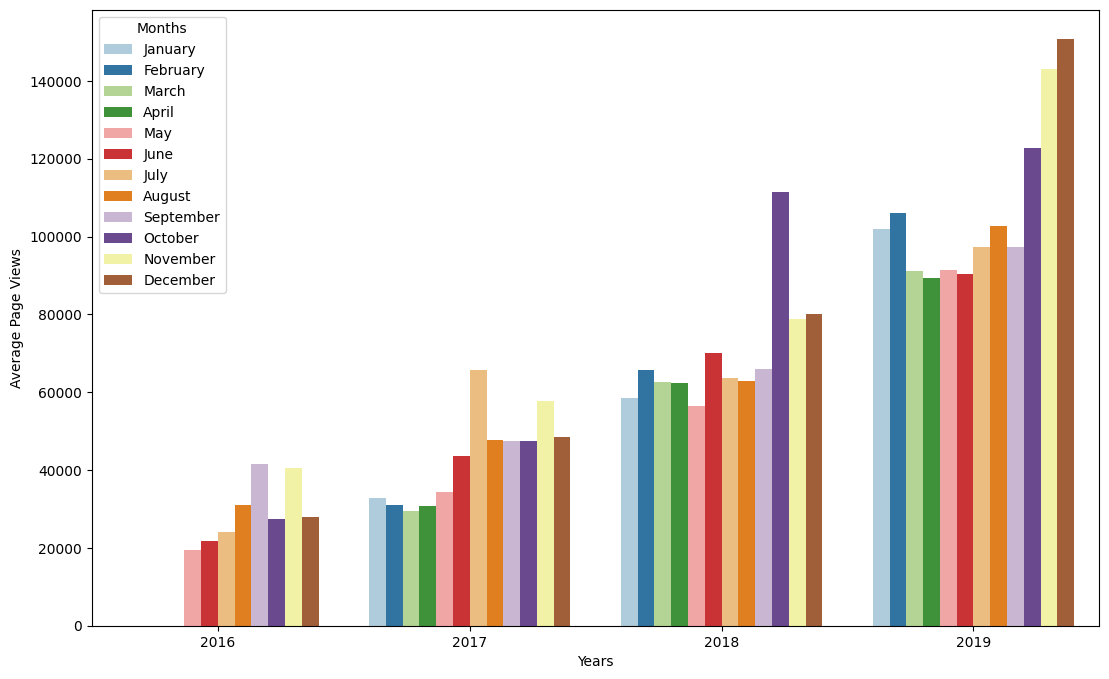

In [8]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar.set_index('date', inplace=True)
    df_bar.index = pd.to_datetime(df_bar.index) 
    df_bar['year'] = df_bar.index.year
    df_bar['month_num'] = df_bar.index.month
    
    df_bar = df_bar.groupby(['year', 'month_num'], observed=False)['value'].mean().reset_index()
    month_map = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
    month_order = list(month_map.values())
    df_bar['month'] = df_bar['month_num'].map(month_map)
    df_bar['month'] = pd.Categorical(df_bar['month'], categories=month_order, ordered=True)


    fig, ax = plt.subplots(figsize=(13, 8))
    palette = sns.color_palette("Paired")
    sns.barplot(data=df_bar, x='year', y='value', hue='month', hue_order=month_order, palette=palette, ax=ax)
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months')
    
draw_bar_plot()

#### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.


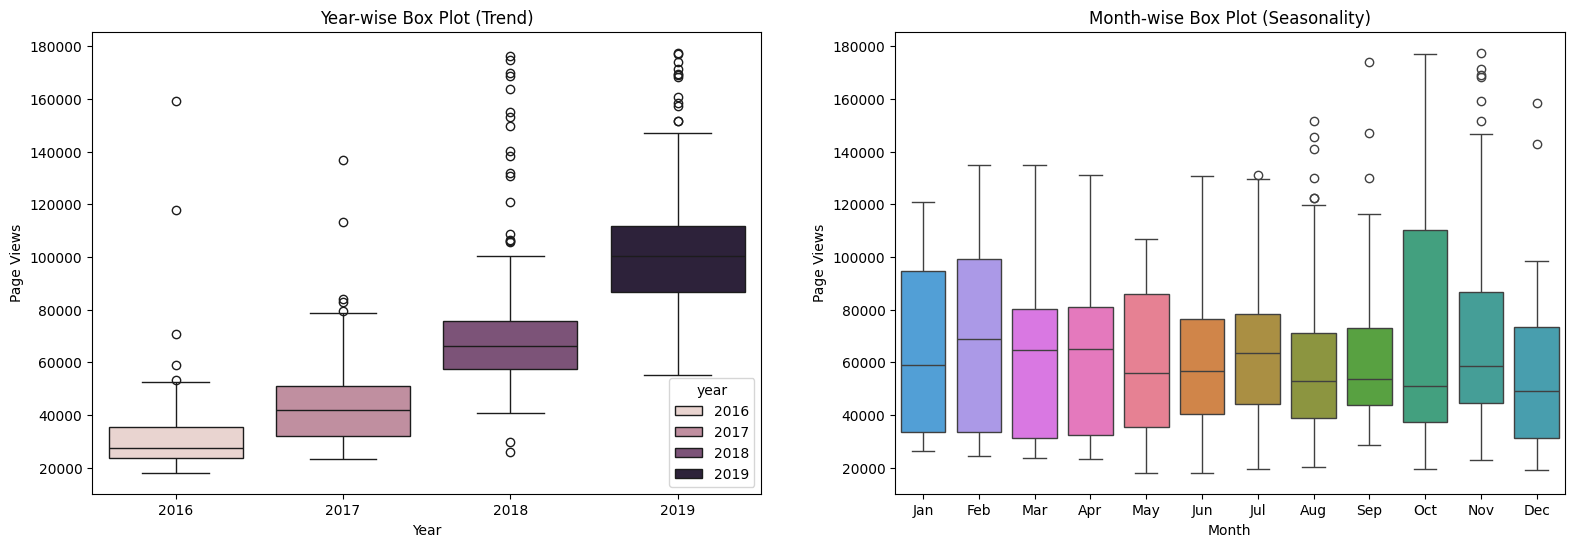

In [10]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['date'] = pd.to_datetime(df_box['date'])
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=ax[0], hue='year')
    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=ax[1], hue='month', order=month_order)
    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Page Views')
    
draw_box_plot()
